# Problem Statement
# Perform sentimental analysis:
# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining


In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,classification_report
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
import re
import warnings
warnings.filterwarnings("ignore")

 # Multi-page web-scraping

In [2]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [3]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer':'https://www.amazon.in/Pride-Lite-Headphones-Cancelling-Tangle-Free/product-reviews/B08SFFS6CK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

# Looping through multiple pages

In [4]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', '').strip()}
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Pride-Lite-Headphones-Cancelling-Tangle-Free/product-reviews/B08SFFS6CK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [7]:
# Save results to a Dataframe, then export as CSV

In [8]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nGood for the price range a...,3.0,Pretty crisp and nice sound good for that budg...,Reviewed in India on 15 October 2023
1,4.0 out of 5 stars\nValue for money,4.0,I get the headphones @149 and 40 rupees delive...,Reviewed in India on 3 October 2023
2,4.0 out of 5 stars\nBass quality,4.0,Bass quality,Reviewed in India on 12 October 2023
3,3.0 out of 5 stars\nNot so durable,3.0,Mic quality music is satisfactory but is not ...,Reviewed in India on 13 October 2023
4,3.0 out of 5 stars\nTips of the earphone are b...,3.0,Ofcourse sound quality is nice and earphone is...,Reviewed in India on 7 October 2023
...,...,...,...,...
185,3.0 out of 5 stars\nWell product,3.0,I give it to my friend and he has been using ...,Reviewed in India on 1 October 2023
186,4.0 out of 5 stars\nWire quality,4.0,"Earphones is good but descent durability, saun...",Reviewed in India on 27 September 2023
187,4.0 out of 5 stars\nNice,4.0,Nice,Reviewed in India on 30 September 2023
188,4.0 out of 5 stars\nNice 👍👍👍,4.0,Nice 👍👍👍👍,Reviewed in India on 29 September 2023


In [9]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on'," ", regex=True)

In [10]:
df.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nGood for the price range a...,3.0,Pretty crisp and nice sound good for that budg...,15 October 2023
1,4.0 out of 5 stars\nValue for money,4.0,I get the headphones @149 and 40 rupees delive...,3 October 2023
2,4.0 out of 5 stars\nBass quality,4.0,Bass quality,12 October 2023
3,3.0 out of 5 stars\nNot so durable,3.0,Mic quality music is satisfactory but is not ...,13 October 2023
4,3.0 out of 5 stars\nTips of the earphone are b...,3.0,Ofcourse sound quality is nice and earphone is...,7 October 2023


In [11]:
df.to_csv('OneplusReview.csv')

In [12]:
# Load Dataset
reviews = pd.read_csv('OneplusReview.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head(11)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nGood for the price range a...,3.0,Pretty crisp and nice sound good for that budg...,15 October 2023
1,4.0 out of 5 stars\nValue for money,4.0,I get the headphones @149 and 40 rupees delive...,3 October 2023
2,4.0 out of 5 stars\nBass quality,4.0,Bass quality,12 October 2023
3,3.0 out of 5 stars\nNot so durable,3.0,Mic quality music is satisfactory but is not ...,13 October 2023
4,3.0 out of 5 stars\nTips of the earphone are b...,3.0,Ofcourse sound quality is nice and earphone is...,7 October 2023
5,3.0 out of 5 stars\nWell product,3.0,I give it to my friend and he has been using ...,1 October 2023
6,4.0 out of 5 stars\nWire quality,4.0,"Earphones is good but descent durability, saun...",27 September 2023
7,4.0 out of 5 stars\nNice,4.0,Nice,30 September 2023
8,4.0 out of 5 stars\nNice 👍👍👍,4.0,Nice 👍👍👍👍,29 September 2023
9,3.0 out of 5 stars\nReview of PTron Headphone,3.0,Its like hearing a music sitting under a tunne...,22 September 2023


# EDA

In [13]:
reviews.Rating.describe()

count    190.000000
mean       3.500000
std        0.501321
min        3.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        4.000000
Name: Rating, dtype: float64

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        190 non-null    object 
 1   Rating       190 non-null    float64
 2   Review       190 non-null    object 
 3   Review_Date  190 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.1+ KB


In [15]:
reviews.isnull().any()

Title          False
Rating         False
Review         False
Review_Date    False
dtype: bool

# Data Visualization
# Date vs Review Count

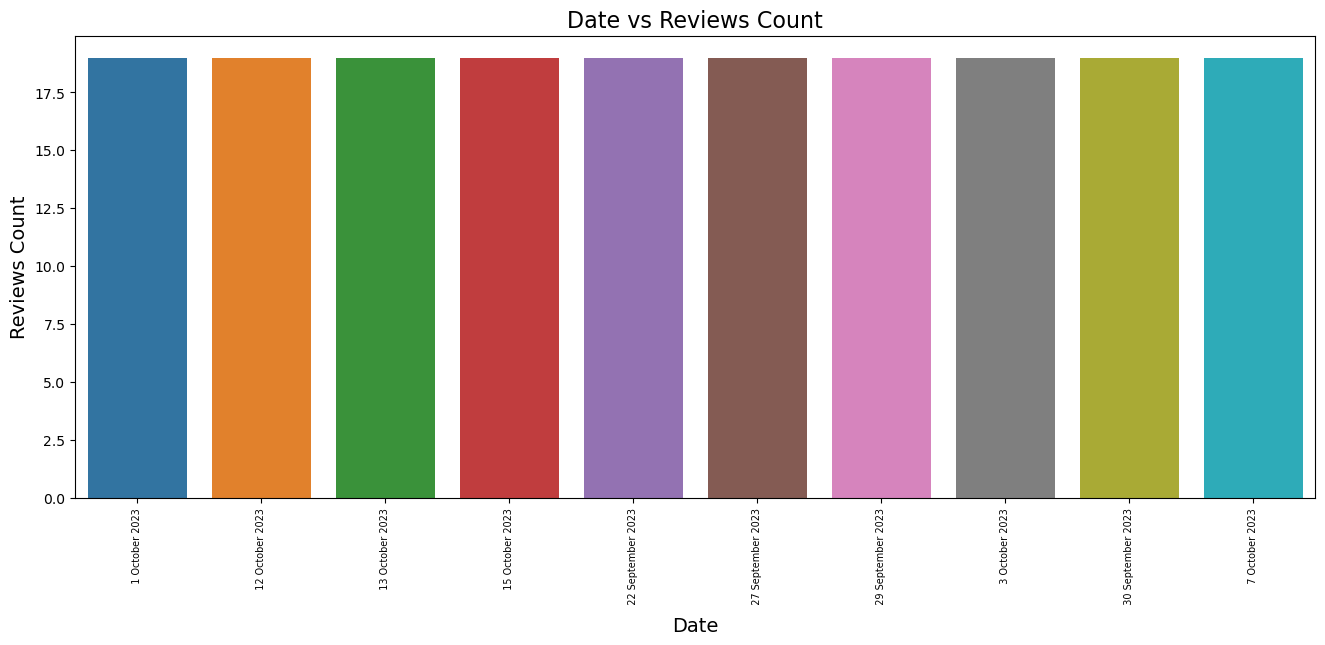

In [16]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()


In [17]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Pretty crisp and nice sound good for that budg...
1    I get the headphones @149 and 40 rubles delive...
2                                         Pass quality
3    Tic quality music  is satisfactory but is not ...
4    Course sound quality is nice and earphone is v...
Name: Review, dtype: object

In [18]:
OnePlus_rvw = reviews[['Review']]
OnePlus_rvw

,Review
0,Pretty crisp and nice sound good for that budg...
1,I get the headphones @149 and 40 rupees delive...
2,Bass quality
3,Mic quality music is satisfactory but is not ...
4,Ofcourse sound quality is nice and earphone is...
...,...
185,I give it to my friend and he has been using ...
186,"Earphones is good but descent durability, saun..."
187,Nice
188,Nice 👍👍👍👍


# Resetting index

In [19]:
OnePlus_rvw.reset_index(drop=True, inplace=True)

In [20]:
OnePlus_rvw

,Review
0,Pretty crisp and nice sound good for that budg...
1,I get the headphones @149 and 40 rupees delive...
2,Bass quality
3,Mic quality music is satisfactory but is not ...
4,Ofcourse sound quality is nice and earphone is...
...,...
185,I give it to my friend and he has been using ...
186,"Earphones is good but descent durability, saun..."
187,Nice
188,Nice 👍👍👍👍


# Creating function for Remove the punctuation and Stop words

In [21]:
#Creating function for Remove the punctuation and Stop words
def cleanwords(title):
    no_punc= [x for x in title if x not in string.punctuation]
    no_pun=''.join(no_punc)
    return [x for x in no_pun.split() if x.lower() not in stopwords.words('english')]

In [22]:
OnePlus_rvw['Review']=OnePlus_rvw['Review'].replace(OnePlus_rvw['Review'].apply(cleanwords))

In [23]:
OnePlus_rvw

,Review
0,Pretty crisp and nice sound good for that budg...
1,I get the headphones @149 and 40 rupees delive...
2,Bass quality
3,Mic quality music is satisfactory but is not ...
4,Ofcourse sound quality is nice and earphone is...
...,...
185,I give it to my friend and he has been using ...
186,"Earphones is good but descent durability, saun..."
187,Nice
188,Nice 👍👍👍👍


In [24]:
OnePlus_rvw['Reviews']=OnePlus_rvw['Review'].apply(cleanwords)
OnePlus_rvw=OnePlus_rvw.drop('Review',axis=1)
OnePlus_rvw

,Reviews
0,"[Pretty, crisp, nice, sound, good, budget, rea..."
1,"[get, headphones, 149, 40, rupees, delivery, c..."
2,"[Bass, quality]"
3,"[Mic, quality, music, satisfactory, durable, d..."
4,"[Ofcourse, sound, quality, nice, earphone, lig..."
...,...
185,"[give, friend, using, long, time, periodI, sai..."
186,"[Earphones, good, descent, durability, saund, ..."
187,[Nice]
188,"[Nice, 👍👍👍👍]"


# Text Pre-processing Techniques


# A. Removing links (http | https)

In [25]:
cleaned_reviews = []

for index, row in OnePlus_rvw.iterrows():
    words_without_links = [word for word in row.Reviews if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

OnePlus_rvw['Reviews'] = cleaned_reviews
OnePlus_rvw.head(10)

,Reviews
0,Pretty crisp nice sound good budget reason giv...
1,get headphones 149 40 rupees delivery charges ...
2,Bass quality
3,Mic quality music satisfactory durable doesnt ...
4,Ofcourse sound quality nice earphone light wei...
5,give friend using long time periodI said provi...
6,Earphones good descent durability saund experi...
7,Nice
8,Nice 👍👍👍👍
9,like hearing music sitting tunnel Sound qualit...


 # B. Removing Review with empty text

In [26]:
dataframe = OnePlus_rvw[OnePlus_rvw['Reviews']!='']
dataframe.head(10)

,Reviews
0,Pretty crisp nice sound good budget reason giv...
1,get headphones 149 40 rupees delivery charges ...
2,Bass quality
3,Mic quality music satisfactory durable doesnt ...
4,Ofcourse sound quality nice earphone light wei...
5,give friend using long time periodI said provi...
6,Earphones good descent durability saund experi...
7,Nice
8,Nice 👍👍👍👍
9,like hearing music sitting tunnel Sound qualit...


# C. Dropping duplicate rows

In [27]:
dataframe.drop_duplicates(subset=['Reviews'], keep=False)
dataframe.head(10)

,Reviews
0,Pretty crisp nice sound good budget reason giv...
1,get headphones 149 40 rupees delivery charges ...
2,Bass quality
3,Mic quality music satisfactory durable doesnt ...
4,Ofcourse sound quality nice earphone light wei...
5,give friend using long time periodI said provi...
6,Earphones good descent durability saund experi...
7,Nice
8,Nice 👍👍👍👍
9,like hearing music sitting tunnel Sound qualit...


# D. Function to remove emoji

In [28]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [29]:
dataframe['Reviews']=dataframe['Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Reviews
0,Pretty crisp nice sound good budget reason giv...
1,get headphones 149 40 rupees delivery charges ...
2,Bass quality
3,Mic quality music satisfactory durable doesnt ...
4,Ofcourse sound quality nice earphone light wei...
5,give friend using long time periodI said provi...
6,Earphones good descent durability saund experi...
7,Nice
8,Nice
9,like hearing music sitting tunnel Sound qualit...


# E. Tokenize 'Reviews'

In [30]:
TextBlob(dataframe['Reviews'][1]).words

WordList(['get', 'headphones', '149', '40', 'rupees', 'delivery', 'charges', 'price', 'good', 'headphone', 'good', 'quality'])

In [31]:
tokenized_review = dataframe['Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [Pretty, crisp, nice, sound, good, budget, rea...
1    [get, headphones, 149, 40, rupees, delivery, c...
2                                      [Bass, quality]
3    [Mic, quality, music, satisfactory, durable, d...
4    [Ofcourse, sound, quality, nice, earphone, lig...
5    [give, friend, using, long, time, periodI, sai...
6    [Earphones, good, descent, durability, saund, ...
7                                               [Nice]
8                                               [Nice]
9    [like, hearing, music, sitting, tunnel, Sound,...
Name: Reviews, dtype: object

In [32]:
dataframe['Tokenized_Reviews'] = dataframe['Reviews'].apply(lambda x: word_tokenize(x))
dataframe.head(10)

,Reviews,Tokenized_Reviews
0,Pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
1,get headphones 149 40 rupees delivery charges ...,"[get, headphones, 149, 40, rupees, delivery, c..."
2,Bass quality,"[Bass, quality]"
3,Mic quality music satisfactory durable doesnt ...,"[Mic, quality, music, satisfactory, durable, d..."
4,Ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig..."
5,give friend using long time periodI said provi...,"[give, friend, using, long, time, periodI, sai..."
6,Earphones good descent durability saund experi...,"[Earphones, good, descent, durability, saund, ..."
7,Nice,[Nice]
8,Nice,[Nice]
9,like hearing music sitting tunnel Sound qualit...,"[like, hearing, music, sitting, tunnel, Sound,..."


# F. Converting words to Stemmer

In [33]:
stemmer =  PorterStemmer()

In [34]:
dataframe['Reviews'].replace(dataframe['Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()])))
dataframe

,Reviews,Tokenized_Reviews
0,Pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
1,get headphones 149 40 rupees delivery charges ...,"[get, headphones, 149, 40, rupees, delivery, c..."
2,Bass quality,"[Bass, quality]"
3,Mic quality music satisfactory durable doesnt ...,"[Mic, quality, music, satisfactory, durable, d..."
4,Ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig..."
...,...,...
185,give friend using long time periodI said provi...,"[give, friend, using, long, time, periodI, sai..."
186,Earphones good descent durability saund experi...,"[Earphones, good, descent, durability, saund, ..."
187,Nice,[Nice]
188,Nice,[Nice]


# G. Converting words to Lemma

In [35]:
word_lemmatizer = WordNetLemmatizer()

dataframe['Reviews'].replace(dataframe['Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()])))

dataframe

,Reviews,Tokenized_Reviews
0,Pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
1,get headphones 149 40 rupees delivery charges ...,"[get, headphones, 149, 40, rupees, delivery, c..."
2,Bass quality,"[Bass, quality]"
3,Mic quality music satisfactory durable doesnt ...,"[Mic, quality, music, satisfactory, durable, d..."
4,Ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig..."
...,...,...
185,give friend using long time periodI said provi...,"[give, friend, using, long, time, periodI, sai..."
186,Earphones good descent durability saund experi...,"[Earphones, good, descent, durability, saund, ..."
187,Nice,[Nice]
188,Nice,[Nice]


# H. Removing Punctuations, Numbers and Special characters

In [36]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [37]:
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Reviews,Tokenized_Reviews
0,pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
1,get headphones rupees delivery charges price...,"[get, headphones, 149, 40, rupees, delivery, c..."
2,bass quality,"[Bass, quality]"
3,mic quality music satisfactory durable doesnt ...,"[Mic, quality, music, satisfactory, durable, d..."
4,ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig..."
5,give friend using long time periodi said provi...,"[give, friend, using, long, time, periodI, sai..."
6,earphones good descent durability saund experi...,"[Earphones, good, descent, durability, saund, ..."
7,nice,[Nice]
8,nice,[Nice]
9,like hearing music sitting tunnel sound qualit...,"[like, hearing, music, sitting, tunnel, Sound,..."


# Applying Countvectorizer (Creating the Bag of Words model)

In [38]:
cv = CountVectorizer(analyzer=cleanwords,ngram_range=(1,3))
count_vec = cv.fit_transform(dataframe['Reviews']).toarray()

In [39]:
count_vec.shape

(190, 67)

In [40]:
cv.get_feature_names_out()[:100]

array(['bass', 'better', 'budget', 'build', 'came', 'charges',
       'condition', 'crisp', 'cut', 'day', 'days', 'delivery', 'descent',
       'doesnt', 'durability', 'durable', 'earbuds', 'earphone',
       'earphones', 'easily', 'easy', 'experience', 'force', 'friend',
       'get', 'give', 'giving', 'good', 'great', 'headphone',
       'headphones', 'hearing', 'light', 'like', 'long', 'mark', 'mic',
       'music', 'next', 'nice', 'ofcourse', 'periodi', 'photo', 'pretty',
       'price', 'provides', 'quality', 'range', 'reason', 'received',
       'rupees', 'said', 'satisfactory', 'saund', 'see', 'sitting',
       'small', 'sound', 'stars', 'time', 'tiny', 'tunnel', 'upto', 'use',
       'using', 'weight', 'work'], dtype=object)

In [41]:
cv.get_params()

{'analyzer': <function __main__.cleanwords(title)>,
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [42]:
count_df = pd.DataFrame(count_vec, columns=cv.get_feature_names_out())
count_df

,bass,better,budget,build,came,charges,condition,crisp,cut,day,...,sound,stars,time,tiny,tunnel,upto,use,using,weight,work
0,0,0,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Transformer

In [43]:
tfidf = TfidfTransformer()
# TF-IDF feature matrix
tf_idf = tfidf.fit_transform(count_vec)

In [44]:
tf_idf.shape

(190, 67)

#  Fetch sentiments Using TextBlob

In [45]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [46]:
sentiments_using_textblob = dataframe.Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Reviews
pos,171
neg,19


# Let's calculate subjectivity and Polarity

In [47]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Reviews.apply(calc_pola)
dataframe.head()

,Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea...",0.675,0.397917
1,get headphones rupees delivery charges price...,"[get, headphones, 149, 40, rupees, delivery, c...",0.600,0.700000
2,bass quality,"[Bass, quality]",0.500,-0.150000
3,mic quality music satisfactory durable doesnt ...,"[Mic, quality, music, satisfactory, durable, d...",0.000,0.000000
4,ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig...",0.675,0.525000


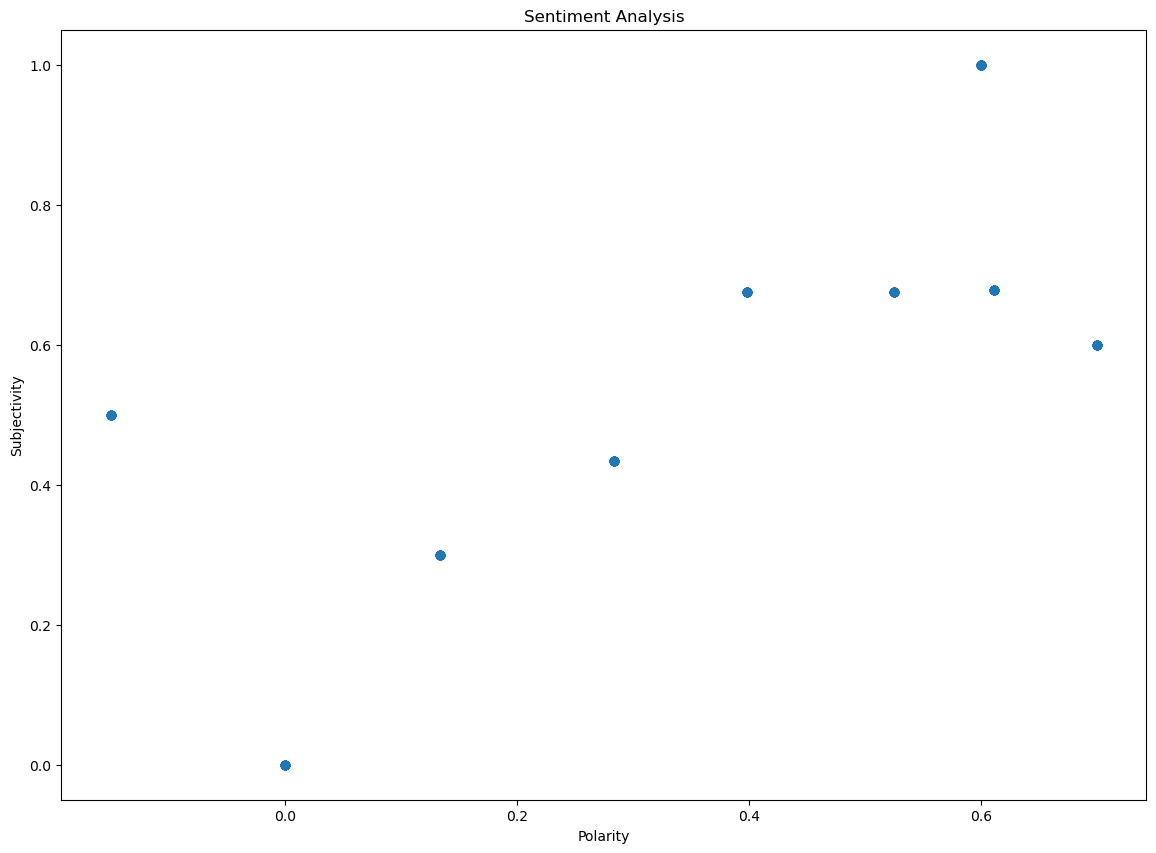

In [50]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe['Polarity'], dataframe['Subjectivity'])
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [51]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe

,Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea...",0.675000,0.397917,pos
1,get headphones rupees delivery charges price...,"[get, headphones, 149, 40, rupees, delivery, c...",0.600000,0.700000,pos
2,bass quality,"[Bass, quality]",0.500000,-0.150000,neg
3,mic quality music satisfactory durable doesnt ...,"[Mic, quality, music, satisfactory, durable, d...",0.000000,0.000000,pos
4,ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig...",0.675000,0.525000,pos
...,...,...,...,...,...
185,give friend using long time periodi said provi...,"[give, friend, using, long, time, periodI, sai...",0.433333,0.283333,pos
186,earphones good descent durability saund experi...,"[Earphones, good, descent, durability, saund, ...",0.677778,0.611111,pos
187,nice,[Nice],1.000000,0.600000,pos
188,nice,[Nice],1.000000,0.600000,pos


#  Story Generation and Visualization

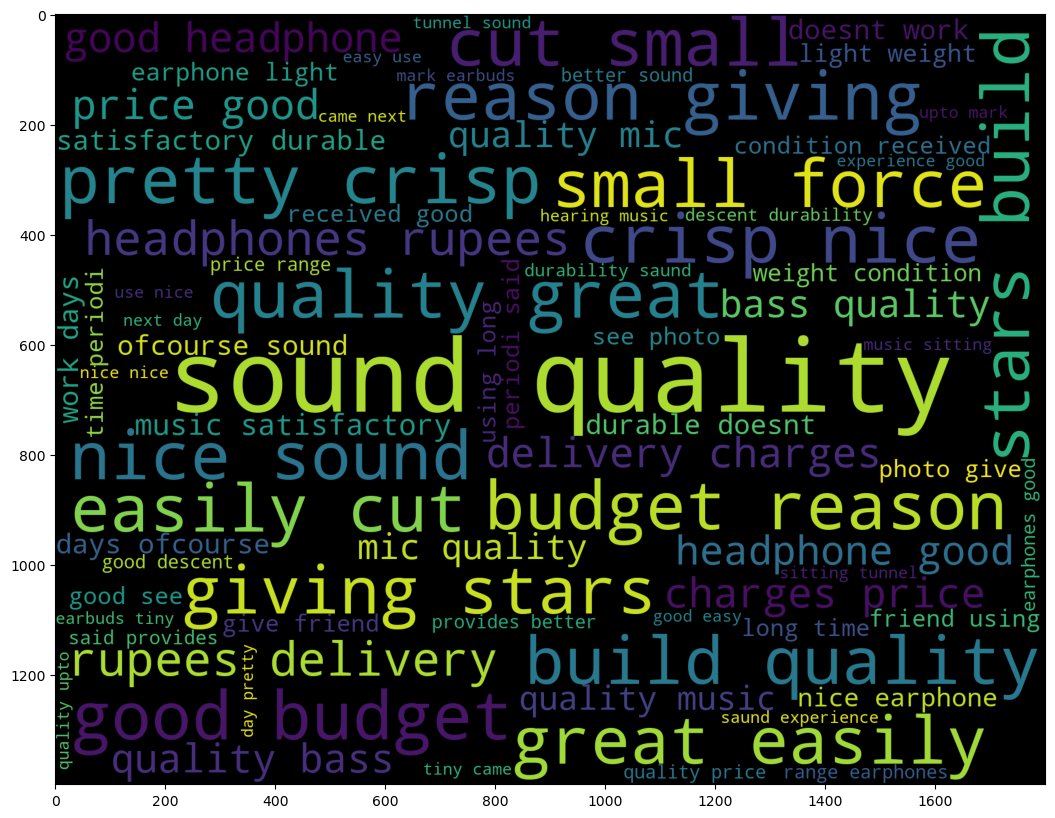

In [53]:
allWords_ = ' '.join([review for review in dataframe[:500]['Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);


# Most common words in positive Review

In [54]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

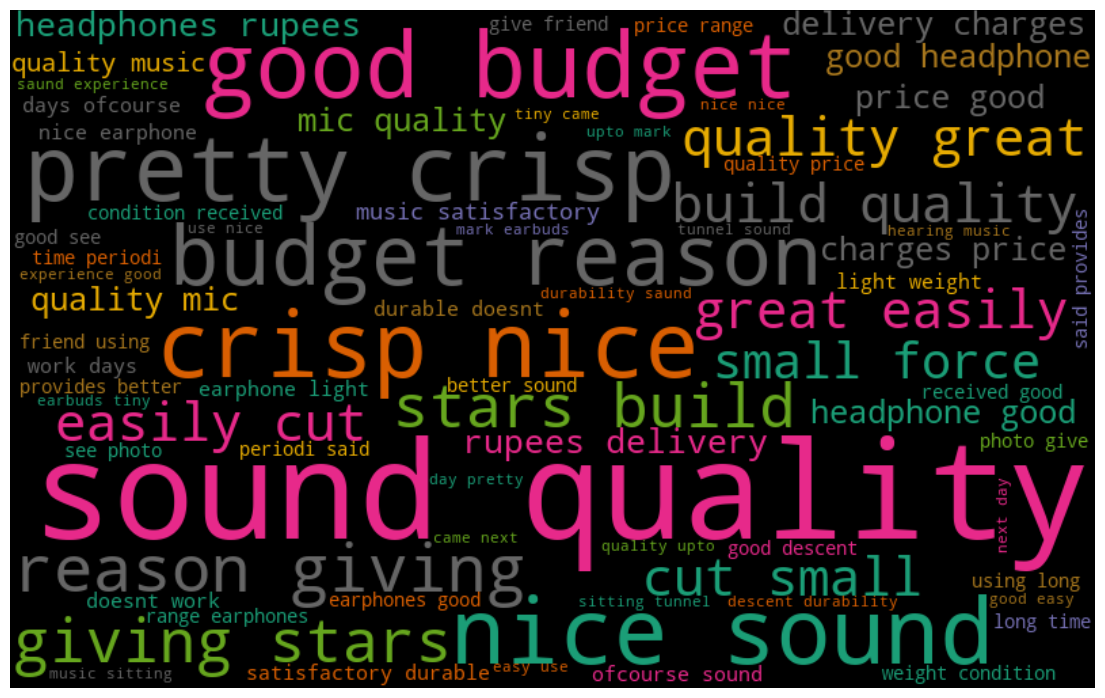

In [55]:
all_words = ' '.join([text for text in dataframe['Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# Most common words in negative Review

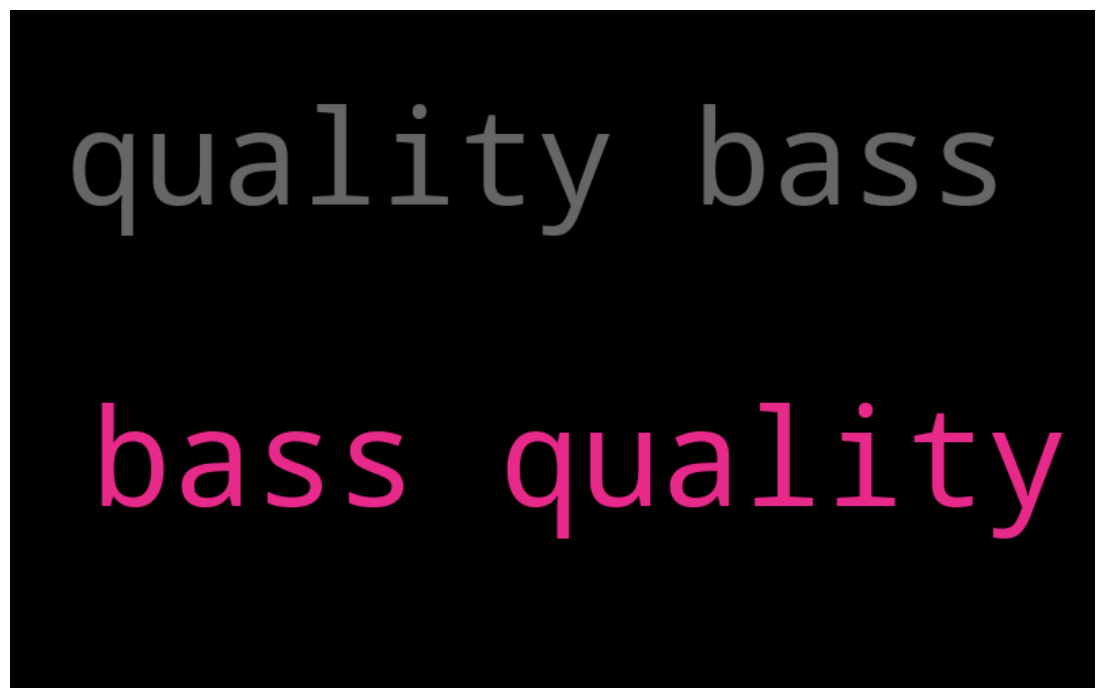

In [57]:
all_words = ' '.join([text for text in dataframe['Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)